# Astroquery, MAST, and HST Spectroscopic Data of Luhman16ab
In this program the astroquery package is used to download Hubble Space Telescope (HST) data from the MAST archive. 
The data is a spectroscopic image of brown dwarf binary Luhman16ab and the program demonstrates how to display the raw spectrum in Python. We can clearly see absorbtion and emission lines identified as FeH and NaI.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits 
from astroquery.mast import Observations

We will begin by searching for suitable HST luhman16ab data in the MAST archive by specifying the target name and observation id. Any result will be displayed in a table format.

In [2]:
# search for data in MAST using astroquery
obs = Observations.query_criteria(obs_collection = 'hst', target_name = '2MASS-J10491891-5319100', 
                                  obsid = '26101019')
obs

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str3,str6,str7,str3,str4,str8,str23,str20,str9,float64,float64,str8,str15,int64,float64,float64,float64,float64,float64,str71,float64,str5,str2,int64,str356,str34,str35,str6,bool,float64,str8,str9
science,HST,CALWF3,WFC3/IR,HST,G141,Infrared,2MASS-J10491891-5319100,STAR;BROWN DWARF;L;T,ica7a3030,162.3108097306,-53.31810828906,spectrum,"Buenzli, Esther",3,56604.44949903935,56604.4793790162,816.0,810.0,2009.9999999999998,Evolution of heterogeneous cloud structure through the T dwarf sequence,56969.82945595,13280,GO,--,POLYGON 162.30292064 -53.31634366 162.30292064 -53.31634367 162.31518888 -53.32080023 162.315821644353 -53.320177084431421 162.32352092 -53.31259313 162.32352093 -53.31259312 162.31125418 -53.30813741 162.31125415 -53.30813743 162.31112675566541 -53.308262907022446 162.31100306033645 -53.308384739728574 162.30292064 -53.31634366 162.30292064 -53.31634366,mast:HST/product/ica7a3031_drz.jpg,mast:HST/product/ica7a3031_drz.fits,PUBLIC,False,nan,26101019,366899176


In [3]:
# The table has only one entry so we will index the first entry
observation = obs['obsid'][0]

In [5]:
# download the data to the notebook directory
Observations.download_products(observation, download_dir='.', productFilename = 'ica7a3031_drz.fits')

Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/ica7a3030/ica7a3031_drz.fits,COMPLETE,None,None


In [8]:
# read in the data into Python
def read_fits(file):
    '''reads in astronomical .fits file and returns header and data
    file [string]: directory of the file to be read in
    '''
    hdu = fits.open(file)
    header = hdu[0].header
    data = hdu[1].data
    return header, data

header, data = read_fits('mastDownload/HST/ica7a3030/ica7a3031_drz.fits')

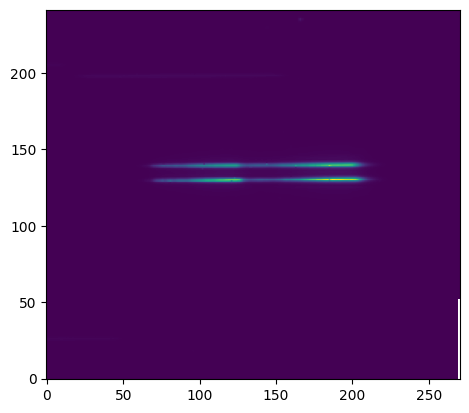

In [10]:
# display raw HST spectrum
plt.imshow(data, origin = 'lower')
plt.show()

In [11]:
# print the header
print(header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  DATE    = '2023-12-16'         / date this file was written (yyyy-mm-dd)        COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H NEXTEND =                    4 / Number of standard extensions                  FILENAME= 'ica7a3031_drz.fits' / name of file                                   FILETYPE= 'SCI      '          / type of data found in data file                                                                                                TELESCOP= 'HST'                / telescope used to acquire data                 INSTRUME= 'WFC3  '             / identif

In [18]:
# print the data
print(data)

[[1.588605   1.4269152  1.1897221  ... 0.9824217  0.8057202         nan]
 [1.5500752  1.3106105  1.2027848  ... 1.0106952  0.7801775         nan]
 [1.2740299  0.88732994 1.1726773  ... 0.9835085  0.8739781         nan]
 ...
 [1.0020366  0.9568085  0.8987405  ... 0.9168106  1.112482   1.1372294 ]
 [1.5214324  2.3305395  4.126657   ... 1.1267656  0.9203893  0.91204894]
 [1.4127309  2.0433042  3.5033631  ... 1.003501   0.45507127 0.8881385 ]]


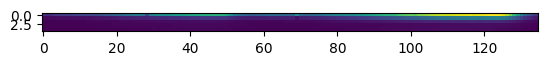

In [19]:
# crop data to extract Luhman 16b raw spectra counts
crop_data = data[140:145,75:210]
plt.imshow(crop_data)
plt.show()
# sum along axis and plot spectra
spectra = np.sum(crop_data, axis = 0)

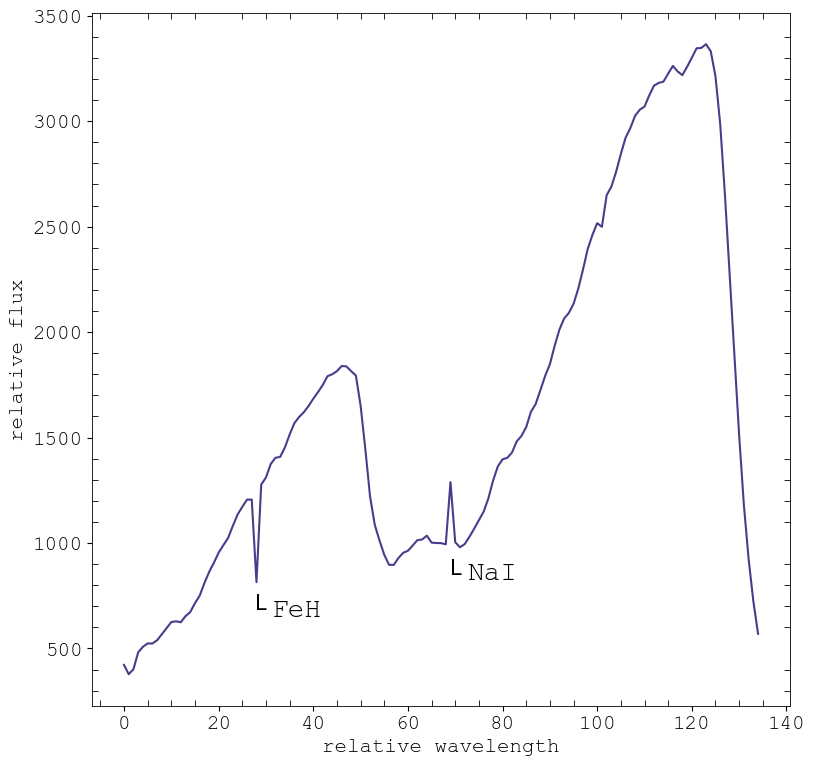

In [26]:
fig, ax = plt.subplots(figsize = (9, 9))
plt.rcParams['font.family'] = 'Courier New'
ax.minorticks_on()
ax.tick_params(which = 'minor', length = 4, direction = 'in', top = True, right = True)
plt.rcParams['axes.linewidth'] = 0.6
ax.tick_params(labelsize = 15)

plt.plot(spectra, 'darkslateblue')
plt.xlabel('relative wavelength', size = 15)
plt.ylabel('relative flux', size = 15)
a = plt.text(27.7, 685, 'L', fontsize = 15, fontname = 'sans-serif', fontweight = 'ultralight')
b = plt.text(31.3, 655, 'FeH', fontsize = 20, fontweight = 'ultralight')
c = plt.text(68.8, 850, 'L', fontsize = 15, fontname = 'sans-serif', fontweight = 'ultralight')
d = plt.text(72.5, 830, 'NaI', fontsize = 20, fontweight = 'ultralight')

The image below is a spectroscopic image of Luhman 16ab from Kellogg, Kendra, and Metchev (2017). The leftmost spectra is very similar to the one obtained in this HST data analysis!
<br>
<br>
Citation: Kellogg, Kendra & Metchev, Stanimir & Heinze, Aren & Gagné, Jonathan & Kurtev, Radostin. (2017). Characterizing The Cloud Decks of Luhman 16AB with Medium-Resolution Spectroscopic Monitoring. The Astrophysical Journal. 849. 10.3847/1538-4357/aa8e4f. 

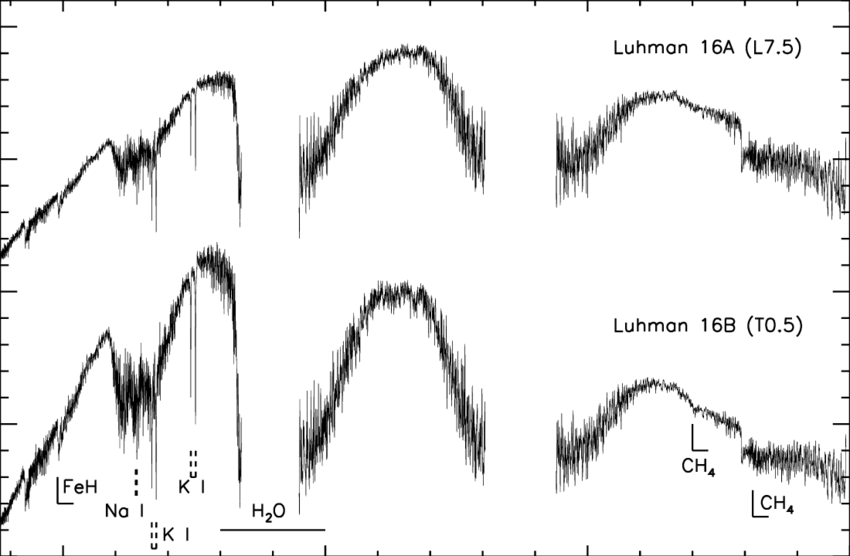